<a href="https://colab.research.google.com/github/pheb2014939/App_VT/blob/main/TabNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.35228 |  0:00:22s
epoch 1  | loss: 0.34459 |  0:00:42s
epoch 2  | loss: 0.34216 |  0:01:05s
epoch 3  | loss: 0.33997 |  0:01:25s
epoch 4  | loss: 0.33907 |  0:01:47s
epoch 5  | loss: 0.33819 |  0:02:07s
epoch 6  | loss: 0.33805 |  0:02:29s
epoch 7  | loss: 0.33636 |  0:02:49s
epoch 8  | loss: 0.33673 |  0:03:10s
epoch 9  | loss: 0.33873 |  0:03:30s
epoch 10 | loss: 0.33971 |  0:03:50s
epoch 11 | loss: 0.33669 |  0:04:11s
epoch 12 | loss: 0.33523 |  0:04:31s
epoch 13 | loss: 0.3332  |  0:04:52s
epoch 14 | loss: 0.33411 |  0:05:11s
epoch 15 | loss: 0.33293 |  0:05:32s
epoch 16 | loss: 0.33411 |  0:05:52s
epoch 17 | loss: 0.33377 |  0:06:12s
epoch 18 | loss: 0.33418 |  0:06:33s
epoch 19 | loss: 0.33303 |  0:06:52s
Accuracy: 89.05%
Precision: 89.05%
Recall: 100.00%
F1 Score: 94.21%
Confusion Matrix:
[[    0  8587]
 [    0 69820]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8587
           1       0.89      1.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


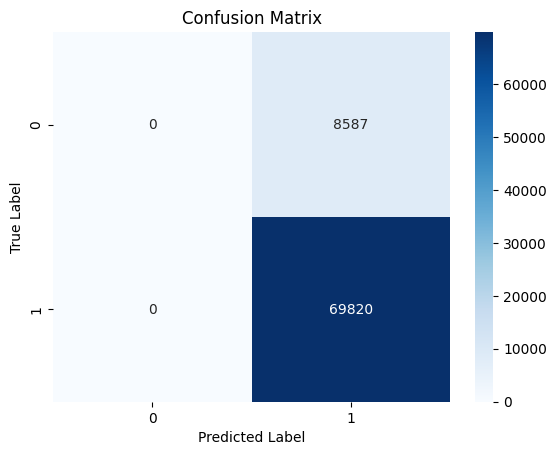

In [2]:
!pip install pytorch-tabnet
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np

# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv'
df = pd.read_csv(path, index_col=0)

# Prepare the data
X = df.drop('Label', axis=1).values
y = df['Label'].values


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TabNet classifier
clf = TabNetClassifier()

# Train the classifier
clf.fit(X_train, y_train, max_epochs=20, patience=10, batch_size=1024, virtual_batch_size=128)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))


# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 392034 entries, 0 to 2931
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      392034 non-null  int64  
 1   Source IP                    392034 non-null  int64  
 2   Source Port                  392034 non-null  int64  
 3   Destination IP               392034 non-null  int64  
 4   Destination Port             392034 non-null  int64  
 5   Protocol                     392034 non-null  int64  
 6   Flow Duration                392034 non-null  int64  
 7   Total Fwd Packets            392034 non-null  int64  
 8   Total Backward Packets       392034 non-null  int64  
 9   Total Length of Fwd Packets  392034 non-null  int64  
 10  Total Length of Bwd Packets  392034 non-null  int64  
 11  Fwd Packet Length Max        392034 non-null  int64  
 12  Fwd Packet Length Min        392034 non-null  int64  
 13  Fwd Pa

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.35471 |  0:00:23s
epoch 1  | loss: 0.34347 |  0:00:47s
epoch 2  | loss: 0.34175 |  0:01:11s
epoch 3  | loss: 0.34209 |  0:01:35s
epoch 4  | loss: 0.34168 |  0:01:58s
epoch 5  | loss: 0.34089 |  0:02:22s
epoch 6  | loss: 0.34038 |  0:02:45s
epoch 7  | loss: 0.33977 |  0:03:09s
epoch 8  | loss: 0.33987 |  0:03:33s
epoch 9  | loss: 0.33999 |  0:03:55s
epoch 10 | loss: 0.33984 |  0:04:19s
epoch 11 | loss: 0.33987 |  0:04:42s
epoch 12 | loss: 0.33972 |  0:05:05s
epoch 13 | loss: 0.33864 |  0:05:28s
epoch 14 | loss: 0.33889 |  0:05:51s
epoch 15 | loss: 0.3392  |  0:06:15s
epoch 16 | loss: 0.33883 |  0:06:39s
epoch 17 | loss: 0.33952 |  0:07:01s
epoch 18 | loss: 0.33777 |  0:07:24s
epoch 19 | loss: 0.3369  |  0:07:47s
epoch 20 | loss: 0.3371  |  0:08:10s
epoch 21 | loss: 0.33689 |  0:08:34s
epoch 22 | loss: 0.33586 |  0:08:56s
epoch 23 | loss: 0.33475 |  0:09:19s
epoch 24 | loss: 0.33447 |  0:09:41s
epoch 25 | loss: 0.33403 |  0:10:04s
epoch 26 | loss: 0.33387 |  0:10:28s
e

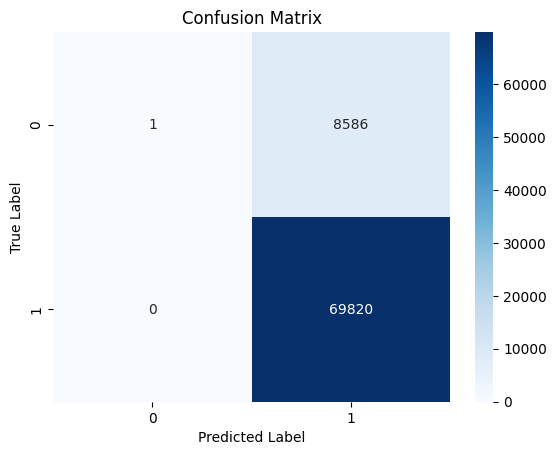

In [8]:
# !pip install pytorch-tabnet

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Required for plotting
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np

# Load the dataset
# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv'
df = pd.read_csv(path, index_col=0)
print(df.info())

# Prepare the data
X = df.drop('Label', axis=1).values  # Fixed typo (dop -> drop)
y = df['Label'].values


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TabNet classifier with different hyperparameters`
clf = TabNetClassifier(
    n_d=16,  # Number of decision steps
    n_a=16,  # Number of attention steps
    n_steps=3,  # Number of steps in the network
    gamma=1.5,  # Regularization parameter
    lambda_sparse=1e-4  # Sparse regularization
)

# Train the classifier
clf.fit(X_train, y_train, max_epochs=100, patience=10, batch_size=1024, virtual_batch_size=128)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



<class 'pandas.core.frame.DataFrame'>
Index: 392034 entries, 0 to 2931
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      392034 non-null  int64  
 1   Source IP                    392034 non-null  int64  
 2   Source Port                  392034 non-null  int64  
 3   Destination IP               392034 non-null  int64  
 4   Destination Port             392034 non-null  int64  
 5   Protocol                     392034 non-null  int64  
 6   Flow Duration                392034 non-null  int64  
 7   Total Fwd Packets            392034 non-null  int64  
 8   Total Backward Packets       392034 non-null  int64  
 9   Total Length of Fwd Packets  392034 non-null  int64  
 10  Total Length of Bwd Packets  392034 non-null  int64  
 11  Fwd Packet Length Max        392034 non-null  int64  
 12  Fwd Packet Length Min        392034 non-null  int64  
 13  Fwd Pa

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.36517 |  0:01:10s
epoch 1  | loss: 0.34471 |  0:02:24s
epoch 2  | loss: 0.34332 |  0:03:30s
epoch 3  | loss: 0.34251 |  0:04:40s
epoch 4  | loss: 0.33973 |  0:05:51s
epoch 5  | loss: 0.33877 |  0:07:00s
epoch 6  | loss: 0.33924 |  0:08:08s
epoch 7  | loss: 0.33871 |  0:09:20s
epoch 8  | loss: 0.33755 |  0:10:31s
epoch 9  | loss: 0.33739 |  0:11:43s
epoch 10 | loss: 0.33745 |  0:12:52s
epoch 11 | loss: 0.33688 |  0:14:01s
epoch 12 | loss: 0.33643 |  0:15:06s
epoch 13 | loss: 0.33769 |  0:16:11s
epoch 14 | loss: 0.33682 |  0:17:14s
epoch 15 | loss: 0.33668 |  0:18:19s
epoch 16 | loss: 0.33521 |  0:19:23s
epoch 17 | loss: 0.33857 |  0:20:29s
epoch 18 | loss: 0.34027 |  0:21:32s
epoch 19 | loss: 0.33825 |  0:22:39s
epoch 20 | loss: 0.33752 |  0:23:43s
epoch 21 | loss: 0.337   |  0:24:48s
epoch 22 | loss: 0.33624 |  0:25:52s
epoch 23 | loss: 0.33476 |  0:26:58s
epoch 24 | loss: 0.33406 |  0:28:01s
epoch 25 | loss: 0.33337 |  0:29:06s
epoch 26 | loss: 0.33157 |  0:30:12s
e

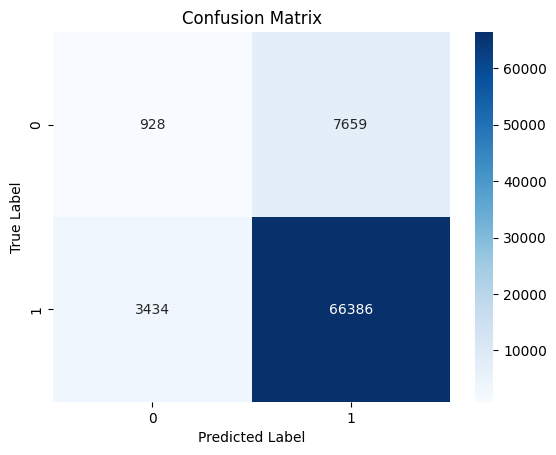

In [1]:
!pip install pytorch-tabnet

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Required for plotting
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np

# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv'
df = pd.read_csv(path, index_col=0)
print(df.info())

# Prepare the data
X = df.drop('Label', axis=1).values  # Fixed typo (dop -> drop)
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TabNet classifier with different hyperparameters
clf = TabNetClassifier(
    n_d=64,  # Number of decision steps in the network
    n_a=32,  # Dimension of the attention embedding
    n_steps=5,  # Number of steps in the attention and aggregation blocks
    gamma=1.3,  # Regularization parameter
    n_independent=2,  # Number of independently trained feature transformers
    n_shared=2,  # Number of shared feature transformers
    momentum=0.02,  # Momentum for batch normalization
    # max_lambda=2.0  # Maximum absolute value for the normalization
    lambda_sparse=1e-4  # Sparse regularization parameter (added)

)

# Train the classifier
clf.fit(X_train, y_train, max_epochs=100, patience=10, batch_size=1024, virtual_batch_size=128)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392034 entries, 0 to 392033
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Flow ID                  392034 non-null  int64  
 1   Source IP                392034 non-null  int64  
 2   Source Port              392034 non-null  int64  
 3   Destination IP           392034 non-null  int64  
 4   Destination Port         392034 non-null  int64  
 5   Protocol                 392034 non-null  int64  
 6   Flow Duration            392034 non-null  int64  
 7   Fwd Packet Length Max    392034 non-null  int64  
 8   Fwd Packet Length Min    392034 non-null  int64  
 9   Bwd Packet Length Min    392034 non-null  int64  
 10  Init_Win_bytes_forward   392034 non-null  int64  
 11  Init_Win_bytes_backward  392034 non-null  int64  
 12  act_data_pkt_fwd         392034 non-null  int64  
 13  min_seg_size_forward     392034 non-null  int64  
 14  Acti

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.36568 |  0:00:54s
epoch 1  | loss: 0.34296 |  0:01:50s
epoch 2  | loss: 0.34072 |  0:02:46s
epoch 3  | loss: 0.34006 |  0:03:40s
epoch 4  | loss: 0.3411  |  0:04:37s
epoch 5  | loss: 0.34028 |  0:05:31s
epoch 6  | loss: 0.33869 |  0:06:27s
epoch 7  | loss: 0.33886 |  0:07:22s
epoch 8  | loss: 0.33728 |  0:08:20s
epoch 9  | loss: 0.33667 |  0:09:24s
epoch 10 | loss: 0.33714 |  0:10:20s
epoch 11 | loss: 0.3444  |  0:11:17s
epoch 12 | loss: 0.34315 |  0:12:11s
epoch 13 | loss: 0.34176 |  0:13:08s
epoch 14 | loss: 0.33982 |  0:14:04s
epoch 15 | loss: 0.33912 |  0:14:58s
epoch 16 | loss: 0.33852 |  0:15:56s
epoch 17 | loss: 0.3396  |  0:16:51s
epoch 18 | loss: 0.34081 |  0:17:49s
epoch 19 | loss: 0.33896 |  0:18:43s
epoch 20 | loss: 0.33841 |  0:19:38s
epoch 21 | loss: 0.33775 |  0:20:35s
epoch 22 | loss: 0.3373  |  0:21:30s
epoch 23 | loss: 0.33694 |  0:22:24s
epoch 24 | loss: 0.33977 |  0:23:20s
epoch 25 | loss: 0.33912 |  0:24:14s
epoch 26 | loss: 0.33829 |  0:25:10s
e

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


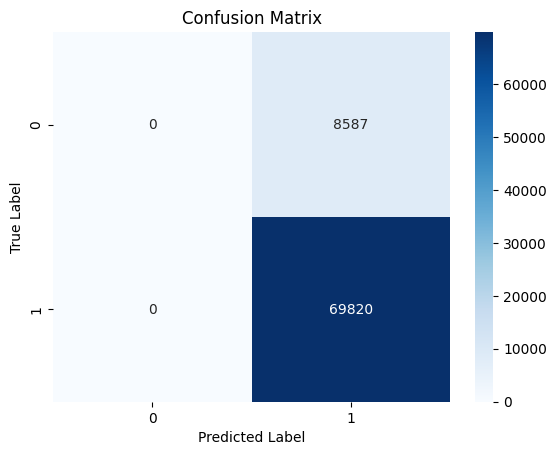

In [2]:
!pip install pytorch-tabnet

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Required for plotting
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np

# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset3.csv'
df = pd.read_csv(path)
print(df.info())

# Prepare the data
X = df.drop('Label', axis=1).values  # Fixed typo (dop -> drop)
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TabNet classifier with different hyperparameters
clf = TabNetClassifier(
    n_d=64,  # Number of decision steps in the network
    n_a=32,  # Dimension of the attention embedding
    n_steps=5,  # Number of steps in the attention and aggregation blocks
    gamma=1.3,  # Regularization parameter
    n_independent=2,  # Number of independently trained feature transformers
    n_shared=2,  # Number of shared feature transformers
    momentum=0.02,  # Momentum for batch normalization
    # max_lambda=2.0  # Maximum absolute value for the normalization
    lambda_sparse=1e-4  # Sparse regularization parameter (added)

)

# Train the classifier
clf.fit(X_train, y_train, max_epochs=100, patience=10, batch_size=1024, virtual_batch_size=128)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
